<h1 align=center><font size = 5>Data Science amb Python</font></h1>



## Sprint 13 
#### S13 T01 : Aprenentatge supervisat - Classificació

#### Cristiane de Souza da Silva

Juny 2021

### Descripción del conjunto de datos

#### Airline2008Nov Dataset Variable definition

 Name                |  Description      
---------------------|:-------------
1.Year               |  2008 
2.Month              |   11
3.DayofMonth         |   1-31
4.DayOfWeek          |  1 (Monday) - 7 (Sunday)
5.DepTime            |actual departure time (local, hhmm)
6.CRSDepTime         |scheduled departure time (local, hhmm)
7.ArrTime            |actual arrival time (local, hhmm)
8.CRSArrTime         |scheduled arrival time (local, hhmm)
9.UniqueCarrier      |unique carrier code
10.FlightNum         |flight number
11.TailNum           |plane tail number
12.ActualElapsedTime |in minutes
13.CRSElapsedTime    |CRS Elapsed Time of Flight (estimated elapse time), in minutes
14.AirTime           |Flight Time, in Minutes, in minutes
15.ArrDelay          |Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes
16.DepDelay          |Difference in minutes between scheduled and actual departure time. Early departures show negative numbers, in minutes
17.Origin            |origin IATA airport code
18.Dest              |destination IATA airport code
19.Distance          |Distance between airports (miles)
20.TaxiIn            |Wheels down and arrival at the destination airport gate, in minutes           
21.TaxiOut           |The time elapsed between departure from the origin airport gate and wheels off, in minutes
22.Cancelled         |was the flight cancelled?
23.CancellationCode  |reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.Diverted          |1 = yes, 0 = no
25.CarrierDelay      |minutes. Carrier delay is within the control of the air carrier. Examples:: aircraft cleaning, aircraft damage, etc
26.WeatherDelay      |munutes. Weather delay is caused by extreme or hazardous weather conditions
27.NASDelay          |minutes. Delay that is within the control of the National Airspace System (NAS) Ex:airport operations,heavy traffic volume,etc
28.SecurityDelay     |minutes. caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach,etc  
29.LateAircraftDelay |minutes. Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport.           

More information about flights delay can be seen in [Federal Aviation Administration site](https://aspmhelp.faa.gov/index/Types_of_Delay.html).

### Ejercicio 1
**Cree al menos tres modelos de clasificación diferentes para intentar predecir mejor el retraso del vuelo DelayedFlights.csv (ArrDelay). Considere si el vuelo llegó tarde o no (ArrDelay> 0).**

Importaré el conjunto de datos limpiado y procesado con las características categóricas transformadas a numéricas del Sprint 12 anterior.

#### Importación de los datos

In [1]:
# import the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar el dataset

df= pd.read_csv('flight_numeric.csv')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend
0,1,3,4,2003.0,2211.0,17,128.0,150.0,116.0,-14.0,8.0,135,284,810,0
1,1,3,4,754.0,1002.0,17,128.0,145.0,113.0,2.0,19.0,135,284,810,0
2,1,3,4,628.0,804.0,17,96.0,90.0,76.0,14.0,8.0,140,48,515,0
3,1,3,4,1829.0,1959.0,17,90.0,90.0,77.0,34.0,34.0,140,48,515,0
4,1,3,4,1940.0,2121.0,17,101.0,115.0,87.0,11.0,25.0,140,149,688,0


Considere si el vuelo llegó tarde o no (ArrDelay> 0).

In [3]:
# Crear 'ArrDelay_class' atributo para  clasificación
df_class = df.copy()
df_class['ArrDelay_class'] = np.where(df_class['ArrDelay']<= 0, 0, 1)

Eliminaré la columna 'ArrDelay' original. 

In [4]:
#Remover la coluna original 'ArrDelay' 

df_class = df_class.drop('ArrDelay', axis=1)
df_class.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,weekend,ArrDelay_class
0,1,3,4,2003.0,2211.0,17,128.0,150.0,116.0,8.0,135,284,810,0,0
1,1,3,4,754.0,1002.0,17,128.0,145.0,113.0,19.0,135,284,810,0,1
2,1,3,4,628.0,804.0,17,96.0,90.0,76.0,8.0,140,48,515,0,1
3,1,3,4,1829.0,1959.0,17,90.0,90.0,77.0,34.0,140,48,515,0,1
4,1,3,4,1940.0,2121.0,17,101.0,115.0,87.0,25.0,140,149,688,0,1


In [5]:
df_class.describe()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,weekend,ArrDelay_class
count,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06
mean,6.107855e+00,1.575206e+01,3.984999e+00,1.518648e+03,1.610242e+03,1.112361e+01,1.333059e+02,1.341977e+02,1.082771e+02,4.309169e+01,1.464957e+02,1.499707e+02,7.649486e+02,2.629893e-01,8.937155e-01
std,3.480753e+00,8.776566e+00,1.996050e+00,4.504352e+02,5.480009e+02,5.933310e+00,7.206007e+01,7.123339e+01,6.864261e+01,5.326600e+01,8.010523e+01,8.075913e+01,5.738858e+02,4.402568e-01,3.082015e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.316000e+03,6.000000e+00,8.000000e+01,8.200000e+01,5.800000e+01,1.200000e+01,8.000000e+01,8.000000e+01,3.380000e+02,0.000000e+00,1.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.715000e+03,1.300000e+01,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,1.550000e+02,1.570000e+02,6.060000e+02,0.000000e+00,1.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,2.030000e+03,1.700000e+01,1.650000e+02,1.650000e+02,1.370000e+02,5.300000e+01,2.100000e+02,2.150000e+02,9.970000e+02,1.000000e+00,1.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,1.900000e+01,1.114000e+03,6.600000e+02,1.091000e+03,2.467000e+03,3.020000e+02,3.010000e+02,4.962000e+03,1.000000e+00,1.000000e+00


Pudimos ver que existe una alta correlación entre el retraso en la salida del vuelo y el retraso en la llegada. También vemos que existe una pequeña correlación negativa entre la distancia y el retraso en la llegada, es decir, cuanto más corta es la distancia del vuelo, tiene más tenencia de llegar más tarde.

#### Análisis exploratorio de los datos

In [6]:
df_class['ArrDelay_class'].value_counts()

1    1723415
0     204956
Name: ArrDelay_class, dtype: int64

In [7]:
# Percentage of delayed flights on arrive

pecentage_delay =(df_class['ArrDelay_class'].value_counts()[1]) / df_class.shape[0]

print("Among all the flights that arrives in this dataset,",  "{:.0%}".format(pecentage_delay), "are delayed flights.")

Among all the flights that arrives in this dataset, 89% are delayed flights.


Podemos verificar cuantos retardos hube a cada mes.

In [8]:
# average of arrive delay by month
month_delay = pd.DataFrame(df_class.groupby('Month')['ArrDelay_class'].sum()).reset_index()
month_delay

,Month,ArrDelay_class
0,1,163801
1,2,171311
2,3,179833
3,4,137941
4,5,135421
5,6,182955
6,7,164534
7,8,143013
8,9,82817
9,10,87989


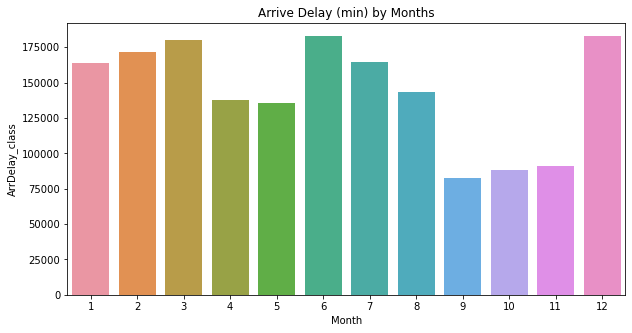

In [9]:
# Month
plt.figure(figsize=(10,5))
sns.barplot( x='Month', y='ArrDelay_class',data=month_delay)
plt.title('Arrive Delay (min) by Months');

Los meses de septiembre, octobre y noviembre son los que tubieron menos retrasos en el año. 

A pesar de ser un mes con vacaciones, Navidad y Año Nuevo, diciembre fue el segundo mes con más minutos de retraso. El primer mes fue junio, mes de  verano y vacaciones,  con solo 10 minutos por delante.

Ahora veremos la cuantidad de vuelos durante la semana y en los fins de semana.

In [10]:
df_class['weekend'].value_counts()


0    1421230
1     507141
Name: weekend, dtype: int64

Ha 1.421.230 vuelos durante todas las  semanas del año, 2.8 vezes más que en el fin de semana. 

De la misma manera, verifiquemos si los dias de la semana o si los fin de semana influencian en los retardos.


Primero verificaremos cuantos vuelos con retrasos ocurren durante la semana y durante los fins de semana.

In [11]:
weekend_delay_min = pd.DataFrame(df_class.groupby('weekend')['ArrDelay_class'].sum()).reset_index()
weekend_delay_min

,weekend,ArrDelay_class
0,0,1274975
1,1,448440


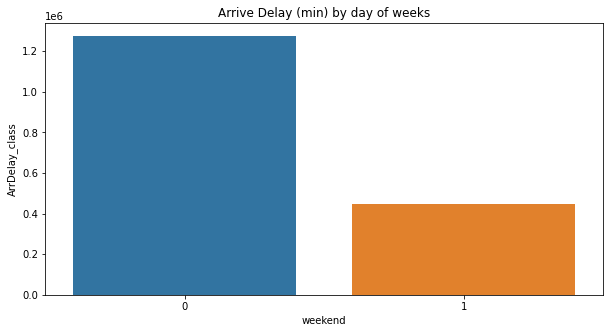

In [12]:
# Weekend
plt.figure(figsize=(10,5))
sns.barplot( x='weekend', y='ArrDelay_class',data=weekend_delay_min)
plt.title('Arrive Delay (min) by day of weeks');

El grafico mostra que hay mas retardos durante la semana que en el fin de semana. Pero eso es por que hay mas vuelos durante la semana que los fines de semana. 

Por todo el año, **durante las semana**, hube 1274975  vuelos con retrasos en la llegada, o sea, **89.7%** de los vuelos de la semana.

A los fines de semana, **88.4%** de los vuelos fueron con retraso.

#### Definir X e y para el conjunto de datos

In [13]:
y = df_class['ArrDelay_class']

X = df_class.drop('ArrDelay_class',axis=1)

#### Normalize los Datos

In [14]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.4674572 , -1.45296765,  0.00751548,  1.07529853,  1.0962717 ,
         0.99040743, -0.07363114,  0.22183882,  0.11250817, -0.65880113,
        -0.14350751,  1.6596185 ,  0.07850241, -0.59735455],
       [-1.4674572 , -1.45296765,  0.00751548, -1.69757607, -1.10992953,
         0.99040743, -0.07363114,  0.151647  ,  0.06880353, -0.45229036,
        -0.14350751,  1.6596185 ,  0.07850241, -0.59735455],
       [-1.4674572 , -1.45296765,  0.00751548, -1.97730561, -1.47124288,
         0.99040743, -0.51770521, -0.62046305, -0.4702204 , -0.65880113,
        -0.0810896 , -1.26265237, -0.4355373 , -0.59735455],
       [-1.4674572 , -1.45296765,  0.00751548,  0.68900535,  0.63641834,
         0.99040743, -0.6009691 , -0.62046305, -0.45565219, -0.17068477,
        -0.0810896 , -1.26265237, -0.4355373 , -0.59735455],
       [-1.4674572 , -1.45296765,  0.00751548,  0.93543376,  0.93203835,
         0.99040743, -0.44831863, -0.26950394, -0.30997004, -0.33964813,
        -0.0810896 , -0.01

#### Train/Test dataset

Los dados seron separados entre los de treino ( train - 70%) y los de teste (test- 30%).

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1349859, 14) (1349859,)
Test set: (578512, 14) (578512,)


#### Modeling : Logistic Regression with Scikit-Learn

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, 
                        solver='sag').fit(X_train,y_train)

#pequeños 'C' espacifican una regularizacion fuerte
# 'sag' es un buen solver para grandes datasets

LR

LogisticRegression(C=0.01, solver='sag')

In [39]:
#Predict
yhat_lr = LR.predict(X_test)

In [40]:
print (yhat_lr [0:5])
print (y_test [0:5])

[1 1 1 1 1]
402118     1
1392211    1
1841950    1
18373      1
1798268    1
Name: ArrDelay_class, dtype: int64


#### Classification : K Nearest Neighbor(KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
#Train Model and Predict  
class_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
class_knn

KNeighborsClassifier(n_neighbors=3)

In [20]:
#Predict
yhat_knn = class_knn.predict(X_test)


In [21]:

print (yhat_knn [0:5])
print (y_test [0:5])

[1 1 1 1 1]
402118     1
1392211    1
1841950    1
18373      1
1798268    1
Name: ArrDelay_class, dtype: int64


#### Classification : Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
# Prediction

predTree = loanTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
402118     1
1392211    1
1841950    1
18373      1
1798268    1
Name: ArrDelay_class, dtype: int64


#### Classification: Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X_train, y_train)

In [26]:
#Predict
yhat_nb = nbclf.predict(X_test)

In [27]:
print (yhat_nb [0:5])
print (y_test [0:5])

[1 1 1 1 1]
402118     1
1392211    1
1841950    1
18373      1
1798268    1
Name: ArrDelay_class, dtype: int64


###  Exercises 2
**Compare classification models using accuracy, a confidence matrix, and other more advanced metrics.**



#### Evaluation: Logistic Regression

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_test, yhat_lr)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_lr, labels=[1,0]))

[[517097    312]
 [ 12736  48367]]


Confusion matrix, without normalization
[[517097    312]
 [ 12736  48367]]


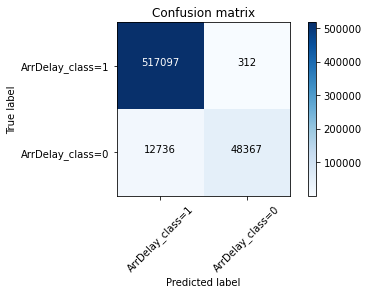

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ArrDelay_class=1','ArrDelay_class=0'],
                      normalize= False,  title='Confusion matrix')

En la matrix acima, la líneas representan las los valores correctos , mientras las colunas representas los valores previstos.

El clasificador previó **517097** casos de vulos retrasados en la llegada correctamente **(true positive)**, y **12736** fueron previstos como vuelos retrasados( positivos )pero en realidad eran vuelos sin retraso **(false positives)**.


Por otro lado, **48367** casos donde no hube retraso de los vuelos en la llegada fueron previstos correctamente (true negative) pero **312** casos que eran positivos pero fureon previstos como negativos **(false negativos)**.


A continuación, podemos ver los resultados de precision, recall y f1_score de Logistic Regression. 

In [44]:
print (classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     61103
           1       0.98      1.00      0.99    517409

    accuracy                           0.98    578512
   macro avg       0.98      0.90      0.93    578512
weighted avg       0.98      0.98      0.98    578512



La precision del los positivos y negativos son altas( 0.98 y 0.99 respectivamente). Entre todos los vuelos  que el clasificador previó como retrasados, 97% estavan certos. 

El recall de esta analise fue de 0.79 para los vuelos que no son retrasados. Entre los vuelos que **realmente no son retrasados** , **78%** fueron previstos como tal. El recall para los **vuelos con retrasos** fue de 1, o sea, la percentage de los vuelos con retraso que fueron clasificados como retrasos fue de 100%. 

La precisión promedio para este clasificador es el promedio de la puntuación F1 para ambas etiquetas, que es 0,97 en nuestro caso.

#### Evaluation: KNN

Confusion matrix, without normalization
[[497965  19444]
 [ 45218  15885]]


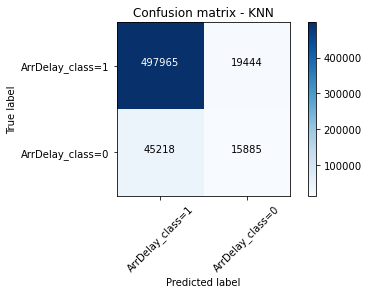

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ArrDelay_class=1','ArrDelay_class=0'],
                      normalize= False,  title='Confusion matrix - KNN')


El clasificador KNN previó **497965** casos de vulos retrasados en la llegada correctamente **(true positive)**, y **45218** fueron previstos como vuelos retrasados( positivos )pero en realidad eran vuelos sin retraso **(false positives)**.


Por otro lado, **15885** casos donde no hube retraso de los vuelos en la llegada fueron previstos correctamente (true negative) pero **19444** casos que eran positivos pero fureon previstos como negativos **(false negativos)**.



In [33]:
print (classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

           0       0.45      0.26      0.33     61103
           1       0.92      0.96      0.94    517409

    accuracy                           0.89    578512
   macro avg       0.68      0.61      0.63    578512
weighted avg       0.87      0.89      0.87    578512



La precision del los positivos(0.92) fue alta  pero la de los negativos es de 0.45

El recall de esta analise fue de 0.26 para los vuelos que no son retrasados. O sea, Entre los vuelos non retrasados que existen  en la analisis, 26% fueron  previstos pelo clasificador. El recall para los **vuelos con retrasos** fue de 0.96. 

La precisión promedio para este clasificador es el promedio de la puntuación F1 para ambas etiquetas, que es 0,97 en nuestro caso.

#### Evaluation: Decision Tree

Confusion matrix, without normalization
[[516809    600]
 [ 58076   3027]]


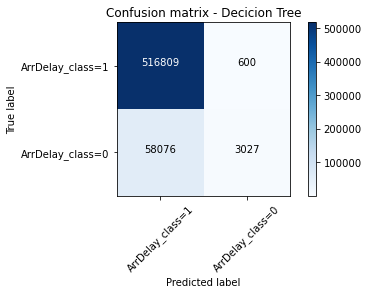

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ArrDelay_class=1','ArrDelay_class=0'],
                      normalize= False,  title='Confusion matrix - Decicion Tree')

In [35]:
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.83      0.05      0.09     61103
           1       0.90      1.00      0.95    517409

    accuracy                           0.90    578512
   macro avg       0.87      0.52      0.52    578512
weighted avg       0.89      0.90      0.86    578512



La precision del los positivos(0.90) fue alta  y la de los negativos es de 0.83.

El recall de esta analise fue de 0.05 para los vuelos que **no son retrasados**. O sea, Entre los vuelos non retrasados que existen  en la analisis, 5% fueron  previstos pelo clasificador. El recall para los **vuelos con retrasos** fue de 1. 

La precisión promedio para este clasificador es el promedio de la puntuación F1 para ambas etiquetas, que es 0,86 en nuestro caso.

#### Evaluation: Naive Bayes

Elegí el clasificador Naive Bayes porque es un algoritmo rápido, preciso y confiable, además de que tiene alta precisión y velocidad en grandes conjuntos de datos.

Confusion matrix, without normalization
[[461479  55930]
 [ 34393  26710]]


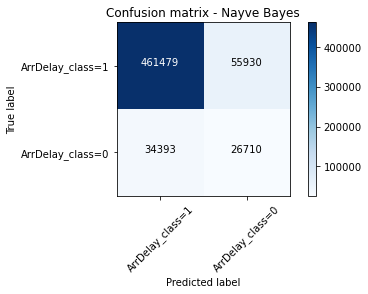

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_nb, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ArrDelay_class=1','ArrDelay_class=0'],
                      normalize= False,  title='Confusion matrix - Nayve Bayes')

In [37]:
print (classification_report(y_test, yhat_nb))

              precision    recall  f1-score   support

           0       0.32      0.44      0.37     61103
           1       0.93      0.89      0.91    517409

    accuracy                           0.84    578512
   macro avg       0.63      0.66      0.64    578512
weighted avg       0.87      0.84      0.85    578512



La precision del los positivos(0.93) fue alta  y la de los negativos es de 0.32.

El recall de esta analise  para los vuelos que **no son retrasados** nos muestra que  44% fueron  previstos pelo clasificador. El recall para los **vuelos con retrasos** fue de 0.89. 

La precisión promedio para este clasificador es el promedio de la puntuación F1 para ambas etiquetas, que es 0,85 en nuestro caso.

### Exercises 3
**Entrénelos usando los diferentes parámetros que soportan.**

El parametro escogido para mejora de los datos de treino es el **K en KNN**, el número de vecinos más cercanos a examinar. 

Y lo especifiqué como K=3, pero será que fue el mejor valor para el parametro?  
¿Cómo elegir el valor correcto para K?
Elijiré  k = 1, usaré la parte de entrenamiento para modelar y calcularé la precisión de la predicción usando todas las muestras en su conjunto de prueba. Repita este proceso, aumentando k, y veré cuál k es el mejor para su modelo.

Podemos calcular la precisión de KNN para diferentes Ks.

In [48]:
#calculate the accuracy of KNN for different Ks.

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn2=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn2)

    
    std_acc[n-1]=np.std(yhat_knn2==y_test)/np.sqrt(yhat_knn2.shape[0])

mean_acc

array([0.87, 0.83, 0.89, 0.88, 0.9 , 0.89, 0.9 , 0.9 , 0.9 ])

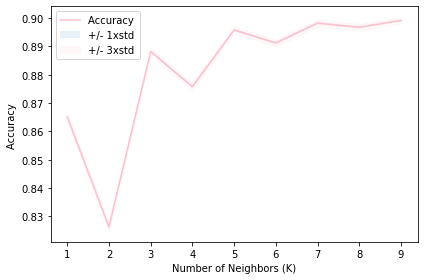

In [49]:
# Plot model accuracy for Different number of Neighbors

plt.plot(range(1,Ks),mean_acc,'pink')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="pink")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [51]:
print( "La mejor acuracia fue con", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

La mejor acuracia fue con 0.8991810022955444 with k= 9


Vamos verificar el clasificador KNN con el k=9

In [52]:
#Train Model and Predict  
class_knn_9 = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)


In [53]:
yhat_knn_9 = class_knn_9.predict(X_test)

In [54]:
print (classification_report(y_test, yhat_knn_9))

              precision    recall  f1-score   support

           0       0.60      0.13      0.22     61103
           1       0.91      0.99      0.95    517409

    accuracy                           0.90    578512
   macro avg       0.75      0.56      0.58    578512
weighted avg       0.87      0.90      0.87    578512



Con el k=9 en el clasificador KNN, la acuracia fue de 0.9, un poco acima de la acuracia con el k=3 ( 0.8).

Comparando el k= 9 con el k=3:

* La precision de los vuelos non retrasados aumentó de 0.45 para 0.60 (aumentó en 33%)y la de los vuelos retrasados diminuiu en 1%, 

* El recall de los vuelos retrasados  aumentó en 3% (de 0.96 para 0.99). 

* Sin embargo, el recall de los vuelos sin retraso diminuiu en 50% (de 0.26 para 0.13)

No hubo un cambio significativo en los valores de los vuelos retrasados con el cambio del K. Además, el tiempo de analisis con el k=9 ha aumentado y no compensó los resultados.

### Exercises 4
**Compare su desempeño usando el enfoque de entrenamiento / prueba o usando todos los datos (validación cruzada).**

El siguiente código divide aleatoriamente el conjunto de entrenamiento en 5 subconjuntos distintos (**fold, cv**), luego entrena y evalúa el clasificador  5 veces, eligiendo un *fold* diferente para evaluarlo cada vez y entrenar en los otros 4 *folds*. El resultado es una matriz que contiene las 5 puntuaciones de evaluación.

Fue utiizado todo el dataset X ,y parael *cross validation*.

#### Logistic Regression- Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

# Aplicación de validación cruzada de cinco partes

scores_LR_ac = cross_val_score(LR, X, y, cv = 5, scoring='accuracy')
scores_LR_recall = cross_val_score(LR, X, y, cv = 5, scoring='recall')
print('Cross-validation scores:{}'.format(scores_LR_ac))
print('Cross-validation scores:{}'.format(scores_LR_recall))

Cross-validation scores:[0.97 0.98 0.98 0.98 0.98]
Cross-validation scores:[1. 1. 1. 1. 1.]


In [56]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_LR_ac.mean(), scores_LR_ac.std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores_LR_recall.mean(), scores_LR_recall.std()))

0.98 accuracy with a standard deviation of 0.00
1.00 recall with a standard deviation of 0.00


Con la utilizacion del croos validation, no hubo mejoría en los valores de accuracia y recall para el classificador Logistic Regresion. 

#### KNN - Cross Validation

In [57]:
class_knn

scores_knn_ac = cross_val_score(class_knn, X, y, cv = 5, scoring='accuracy')
scores_knn_recall = cross_val_score(class_knn, X, y, cv = 5, scoring='recall')
print('Cross-validation scores:{}'.format(scores_knn_ac))
print('Cross-validation scores:{}'.format(scores_knn_recall))

Cross-validation scores:[0.88 0.87 0.88 0.86 0.85]
Cross-validation scores:[0.97 0.95 0.96 0.93 0.91]


In [58]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_knn_ac.mean(), scores_knn_ac.std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores_knn_recall.mean(), scores_knn_recall.std()))

0.87 accuracy with a standard deviation of 0.01
0.94 recall with a standard deviation of 0.02


#### Decicion Tree- Cross Validation

In [59]:
scores_tree_ac = cross_val_score(loanTree, X, y, cv = 5, scoring='accuracy')
scores_tree_recall = cross_val_score(loanTree, X, y, cv = 5, scoring='recall')
print('Cross-validation scores:{}'.format(scores_tree_ac))
print('Cross-validation scores:{}'.format(scores_tree_recall))

Cross-validation scores:[0.9 0.9 0.9 0.9 0.9]
Cross-validation scores:[1. 1. 1. 1. 1.]


In [60]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_tree_ac.mean(), scores_tree_ac.std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores_tree_recall.mean(), scores_tree_recall.std()))

0.90 accuracy with a standard deviation of 0.00
1.00 recall with a standard deviation of 0.00


#### Naive Bayes- Cross Validation

In [61]:
scores_nb_ac = cross_val_score(nbclf, X, y, cv = 5, scoring='accuracy')
scores_nb_recall = cross_val_score(nbclf, X, y, cv = 5, scoring='recall')
print('Cross-validation scores:{}'.format(scores_nb_ac))
print('Cross-validation scores:{}'.format(scores_nb_recall))

Cross-validation scores:[0.86 0.84 0.84 0.83 0.8 ]
Cross-validation scores:[0.92 0.89 0.89 0.88 0.82]


In [62]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_nb_ac.mean(), scores_nb_ac.std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores_nb_recall.mean(), scores_nb_recall.std()))

0.84 accuracy with a standard deviation of 0.02
0.88 recall with a standard deviation of 0.03


In [63]:
measure_cross = pd.DataFrame({'validation': ['acc - sin cross validation ', 'acc - con cross validation'], 
                             'LR': [0.98, 0.98],
                             'KNN':[0.89,0.87],
                             'Decision Tree': [0.90, 0.90],
                             'Naive Bayes': [0.84,0.84], 
                            })
measure_cross

,validation,LR,KNN,Decision Tree,Naive Bayes
0,acc - sin cross validation,0.98,0.89,0.9,0.84
1,acc - con cross validation,0.98,0.87,0.9,0.84


La validación cruzada permite obtener una estimación del rendimiento del modelo y también una medida de la precisión de esta estimación.

Todos los modelos, excepto el KNN , tubieron la acuracia igual en las duas validacions.

Tanto  modelo KNN cuyo k=3, cual el con k=9,  tubieron una pequena diferencia entre la acuracia sin cross validation y la  con cross validacion(0.89 y 0.9 respectivamente). Esto no significa que el modelo se sobreajusta mal (overfitting) pero el  funciona peor que el modelo de Logistic Regression.

### Exercises 5
**Realice algún proceso de ingeniería variable para mejorar la predicción**

Vamos a crear el atributo de velocidad para comprobar si influye en los retrasos en la llegada de los vuelos.

In [64]:
# copia de la df_class

df_new = df_class.copy()

#creacion del atributo 'velocidad'

df_new['velocidad'] =df_new['Distance'] /df_new['ActualElapsedTime']
df_new.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,weekend,ArrDelay_class,velocidad
0,1,3,4,2003.0,2211.0,17,128.0,150.0,116.0,8.0,135,284,810,0,0,6.328125
1,1,3,4,754.0,1002.0,17,128.0,145.0,113.0,19.0,135,284,810,0,1,6.328125
2,1,3,4,628.0,804.0,17,96.0,90.0,76.0,8.0,140,48,515,0,1,5.364583
3,1,3,4,1829.0,1959.0,17,90.0,90.0,77.0,34.0,140,48,515,0,1,5.722222
4,1,3,4,1940.0,2121.0,17,101.0,115.0,87.0,25.0,140,149,688,0,1,6.811881


In [68]:
df_new['velocidad'].describe()

count    1.928371e+06
mean     5.253787e+00
std      1.504293e+00
min      1.833333e-01
25%      4.258621e+00
50%      5.369048e+00
75%      6.338235e+00
max      2.771429e+01
Name: velocidad, dtype: float64

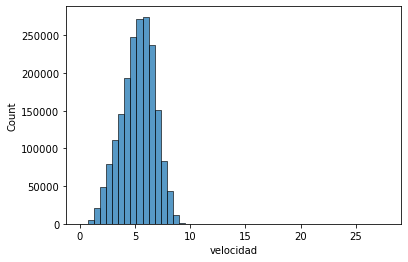

In [72]:
sns.histplot(data=df_new, x="velocidad", bins =50);

Segun el grafico y las estatisticas de arriba, el promedio de la velocidad del vuelo es de 5.25 millas/min (315 millas/ hora), llegando al maximo de 27.7 millas/min (1662 millas/min).

Veremos el impacto de la distancia en la velocidad.

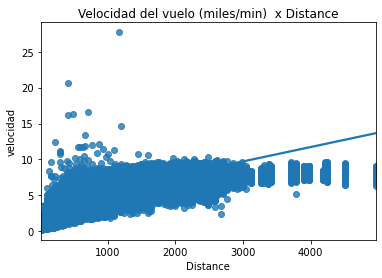

In [74]:
sns.regplot(x="Distance", y="velocidad", data=df_new)
plt.title('Velocidad del vuelo (millas/min)  x Distance');

Segun en el grafico de arriba, hay una fuerte correlacion positiva entre la velocidad y la distancia: cuanto mayor la distancia, la velocidade tiene la tendencia a ser mayor tambien.

Pero para las distancias mayores que 3000 millas, las velocidades tendem a se quedr por debajo de la línea de tendencia. 

Vamos verificar la cuatidad de atrasos en la llegada de los vuelos con distancias acima de 3000 millas y los de abajo de 3000 millas.

In [95]:
df_velocidade1 = pd.DataFrame(df_new.loc[df_new['Distance'] > 3000]).reset_index(drop=True)

df_velocidade1

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,weekend,ArrDelay_class,velocidad
0,1,1,2,1030.0,1541.0,15,551.0,552.0,517.0,20.0,210,129,4243,0,1,7.700544
1,1,2,3,1037.0,1535.0,15,538.0,552.0,515.0,27.0,210,129,4243,0,1,7.886617
2,1,3,4,1028.0,1515.0,15,527.0,552.0,511.0,18.0,210,129,4243,0,0,8.051233
3,1,5,6,1129.0,1700.0,15,571.0,552.0,525.0,79.0,210,129,4243,1,1,7.430823
4,1,6,7,1038.0,1554.0,15,556.0,552.0,527.0,28.0,210,129,4243,1,1,7.631295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,12,10,3,1149.0,1627.0,6,578.0,580.0,554.0,74.0,18,129,4502,0,1,7.788927
3474,12,11,4,1229.0,1644.0,6,555.0,580.0,533.0,114.0,18,129,4502,0,1,8.111712
3475,12,11,4,1720.0,708.0,6,528.0,522.0,498.0,30.0,129,18,4502,0,1,8.526515
3476,12,12,5,1057.0,1541.0,6,584.0,580.0,556.0,22.0,18,129,4502,0,1,7.708904


In [103]:
print(df_velocidade1.shape)
print(df_velocidade1['ArrDelay_class'].sum())
print(print(df_velocidade1['velocidad'].mean()))

(3478, 16)
2762
8.048453294232944
None


In [96]:
df_velocidade2 = pd.DataFrame(df_new.loc[df_new['Distance'] <= 3000]).reset_index(drop=True)

df_velocidade2

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,weekend,ArrDelay_class,velocidad
0,1,3,4,2003.0,2211.0,17,128.0,150.0,116.0,8.0,135,284,810,0,0,6.328125
1,1,3,4,754.0,1002.0,17,128.0,145.0,113.0,19.0,135,284,810,0,1,6.328125
2,1,3,4,628.0,804.0,17,96.0,90.0,76.0,8.0,140,48,515,0,1,5.364583
3,1,3,4,1829.0,1959.0,17,90.0,90.0,77.0,34.0,140,48,515,0,1,5.722222
4,1,3,4,1940.0,2121.0,17,101.0,115.0,87.0,25.0,140,149,688,0,1,6.811881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924888,12,13,6,1250.0,1617.0,6,147.0,152.0,120.0,30.0,199,18,906,1,1,6.163265
1924889,12,13,6,657.0,904.0,6,127.0,109.0,78.0,57.0,241,18,481,1,1,3.787402
1924890,12,13,6,1007.0,1149.0,6,162.0,143.0,122.0,80.0,18,136,689,1,1,4.253086
1924891,12,13,6,1251.0,1446.0,6,115.0,117.0,89.0,11.0,135,18,533,1,1,4.634783


In [102]:
print(df_velocidade2.shape)
print(df_velocidade2['ArrDelay_class'].sum())
print(print(df_velocidade2['velocidad'].mean()))

(1924893, 16)
1720653
5.248737401400288
None


Donde la distancia del vuelo fue mayor que 3000 miles, hubo menos retrasos (2762) y el promedio de la velocidad fue de 8.0 miles/min entre esos vuelos. Esto representa 79% de los vuelos cuya la distancia es mayor a 3000 miles.

Donde la distancia del vuelo fue menor o igual que 3000 miles, hubo más retrasos (1720653) y el promedio de la velocidad fue de 5.2 miles/min entre esos vuelos. Esto representa 89% de los vuelos cuya la distancia es menor o igual a 3000 miles.


Ahora que el atributo velocidad (miles/min) fue creado, vamos separar novamente el dataset y  normalizarlo.

In [65]:
#Separar el dataset
y2 = df_new['ArrDelay_class']

X2 = df_new.drop('ArrDelay_class',axis=1)

#Normalizar los datos

X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
X2[0:5]

array([[-1.47, -1.45,  0.01,  1.08,  1.1 ,  0.99, -0.07,  0.22,  0.11,
        -0.66, -0.14,  1.66,  0.08, -0.6 ,  0.71],
       [-1.47, -1.45,  0.01, -1.7 , -1.11,  0.99, -0.07,  0.15,  0.07,
        -0.45, -0.14,  1.66,  0.08, -0.6 ,  0.71],
       [-1.47, -1.45,  0.01, -1.98, -1.47,  0.99, -0.52, -0.62, -0.47,
        -0.66, -0.08, -1.26, -0.44, -0.6 ,  0.07],
       [-1.47, -1.45,  0.01,  0.69,  0.64,  0.99, -0.6 , -0.62, -0.46,
        -0.17, -0.08, -1.26, -0.44, -0.6 ,  0.31],
       [-1.47, -1.45,  0.01,  0.94,  0.93,  0.99, -0.45, -0.27, -0.31,
        -0.34, -0.08, -0.01, -0.13, -0.6 ,  1.04]])

In [104]:
#Train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y2, test_size=0.3, random_state=4)

print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test2.shape,  y_test2.shape)

Train set: (1349859, 15) (1349859,)
Test set: (578512, 15) (578512,)


Verificaremos si hubo alguna mejoria en el modelo Logistic Regression, cuya acuracia fue la mayor de los cuatro modelos.

In [105]:
#Modelo con un nuevo dataset acrecido del nuevo atributo 'velocida'
LR2 = LogisticRegression(C=0.01, 
                        solver='sag').fit(X_train2,y_train2)

#prediction
yhat_lr2 = LR2.predict(X_test2)

In [106]:
print (classification_report(y_test2, yhat_lr2))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     61262
           1       0.98      1.00      0.99    517250

    accuracy                           0.98    578512
   macro avg       0.99      0.90      0.94    578512
weighted avg       0.98      0.98      0.98    578512



La precision de los vuelos no retrasados aumento de 0.99 para 1 y su recall aumeto de 0.79 para 0.80.

Los valores para los vuelos retrasados se mantivieron los mismos.

### Exercises 6
**No use la variable DepDelay al hacer predicciones**

Vamos eliminar la variable 'DepDelay'

In [110]:
#Separar el dataset
y3 = df_new['ArrDelay_class']

X3 = df_new.drop(['ArrDelay_class', 'DepDelay'],axis=1)

#Normalizar los datos

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
X3[0:5]

array([[-1.47, -1.45,  0.01,  1.08,  1.1 ,  0.99, -0.07,  0.22,  0.11,
        -0.14,  1.66,  0.08, -0.6 ,  0.71],
       [-1.47, -1.45,  0.01, -1.7 , -1.11,  0.99, -0.07,  0.15,  0.07,
        -0.14,  1.66,  0.08, -0.6 ,  0.71],
       [-1.47, -1.45,  0.01, -1.98, -1.47,  0.99, -0.52, -0.62, -0.47,
        -0.08, -1.26, -0.44, -0.6 ,  0.07],
       [-1.47, -1.45,  0.01,  0.69,  0.64,  0.99, -0.6 , -0.62, -0.46,
        -0.08, -1.26, -0.44, -0.6 ,  0.31],
       [-1.47, -1.45,  0.01,  0.94,  0.93,  0.99, -0.45, -0.27, -0.31,
        -0.08, -0.01, -0.13, -0.6 ,  1.04]])

In [111]:
#Train and test
X_train3, X_test3, y_train3, y_test3 = train_test_split( X3, y3, test_size=0.3, random_state=8)

print ('Train set:', X_train3.shape,  y_train3.shape)
print ('Test set:', X_test3.shape,  y_test3.shape)

Train set: (1349859, 14) (1349859,)
Test set: (578512, 14) (578512,)


#### Logistic Regression - sin 'DepDelay'

In [112]:
#Modelo con un nuevo dataset acrecido del nuevo atributo 'velocida' y sin el atributo 'DepDelay'
LR3 = LogisticRegression(C=0.01, 
                        solver='sag').fit(X_train3,y_train3)

#prediction
yhat_lr3 = LR3.predict(X_test3)
print (classification_report(y_test3, yhat_lr3))

              precision    recall  f1-score   support

           0       0.51      0.15      0.24     61477
           1       0.91      0.98      0.94    517035

    accuracy                           0.89    578512
   macro avg       0.71      0.57      0.59    578512
weighted avg       0.87      0.89      0.87    578512



#### KNN - sin 'DepDelay'

In [114]:
#Modelo con un nuevo dataset acrecido del nuevo atributo 'velocida' y sin el atributo 'DepDelay'
k = 3
#Train Model and Predict  
class_knn3 = KNeighborsClassifier(n_neighbors = k).fit(X_train3,y_train3)


#prediction
yhat_knn3 = class_knn3.predict(X_test3)
print (classification_report(y_test3, yhat_knn3))

              precision    recall  f1-score   support

           0       0.37      0.18      0.24     61477
           1       0.91      0.96      0.94    517035

    accuracy                           0.88    578512
   macro avg       0.64      0.57      0.59    578512
weighted avg       0.85      0.88      0.86    578512



#### Decision Tree - sin 'DepDelay'

In [116]:
#Modelo con un nuevo dataset acrecido del nuevo atributo 'velocida' y sin el atributo 'DepDelay'
loanTree3 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree3.fit(X_train3,y_train3)
#prediction
predTree3 = loanTree3.predict(X_test3)
print (classification_report(y_test3, predTree3))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     61477
           1       0.89      1.00      0.94    517035

    accuracy                           0.89    578512
   macro avg       0.45      0.50      0.47    578512
weighted avg       0.80      0.89      0.84    578512



#### Naive Bayes - sin 'DepDelay'

In [117]:
nbclf3 = GaussianNB().fit(X_train3, y_train3)

yhat_nb3 = nbclf3.predict(X_test3)

print (classification_report(y_test3, yhat_nb3))

              precision    recall  f1-score   support

           0       0.20      0.22      0.21     61477
           1       0.91      0.90      0.90    517035

    accuracy                           0.82    578512
   macro avg       0.55      0.56      0.55    578512
weighted avg       0.83      0.82      0.83    578512



#### Conclusion

La analisis ha mostrado que durante la primavera y el otono de 2018 son los periodos donde hubieron menos retardos en el año . EL mes de junio seguido de el mes de deciembre fueron los meses con más vuelos con retrasos en la llegada. Esto és por que junio es un  mes de  verano donde las personas viajan más y por lo tanto hay más vuelos, y en deciembre es un mes de festivos donde tambien las personas viajan más.

Los resultados também mostraron que hay mas retardos durante la semana que en el fin de semana.

Hay una tendencia mayor en haver retrasos de los vuelos cuya distancia sean menores que 3000 miles y el promedio de la velocidad sea de 5.2 miles/min (312 millas/hora).

* **Analisis considendo el atributo DepArray ( retraso  en la del vuelo):**

El objetivo de la analisis es de prever los **vuelos con retraso ('ArrDelay_class' = 1)**. Los cuatro clasificadores tuvieron una alta precision (0.98 - Logistic Regression, 0.92 - KNN y 0.90 - Decision Tree, 0.93 - Naive Bayes). Esto significa que todos los vuelos previstos como retrasados tuvieron el acerto acima de 90% en los cuatro clasificadores.


El recall de los vuelos retrasados para los cuatro clasificadores tambien tuvieron la proporcion  minima de 0.89 y maxima de 1. Esta es la proporción de vuelos con retrasos que fueron detectadas correctamente por los clasificadores. Entonces para clasificacion de los vuelos con retrasos, los cuatros clasificadores son buenos considerando el recall.

Sin embargo, para clasificacion de los **vuelos sin retraso('ArrDelay_class' = 0)**, el mejor clasificador es el Logstic Regression con su acuracia de 0.99 de y recall de 0.79.

Despues de aplical el *cross validation* en todos los modelos, ellos,  excepto el KNN , tubieron la acuracia igual en las duas validacions.
Esto no significa que el modelo KNN se sobreajusta mal (overfitting) pero el  funciona peor que el modelo de Logistic Regression. 

Con la adicion de la variable **velocidad** al dataset, el modelo de Logist Regression tube su precision y recall de los vuelos non retrasados aumentados. O sea, la percentage de los vuelos sin retraso que fueron clasificados como sin retrasos  aumento de 0.79 para 0.8. 

De los cuatro modelos ( Logistic Regression, KNN, Decision Tree  Naive Bayes), **el clasificador Logistic Regrision fuel el que tube mejor evaluación para clasificar los vuelos retrasados en la llegada**. Los otros tres tuviron resultados similares pero con valores de pecision y recall un poco abajo de los de Logist Regression.

* **Analisis sin el atributo DepArray:**

Cuanto a los **vuelos con retraso** , los cuatro clasificadores tuvieron una  precision abajo de los clasificadore que consideraron el atributo 'DepArray', pero aun acima de xxx% (0.91 - Logistic Regression, 0.91 - KNN y 0.89 - Decision Tree, 091 - Naive Bayes). Esto significa que todos los vuelos previstos como retrasados tuvieron el acerto acima de 89% en los cuatro clasificadores.

El recall de los vuelos retrasados para los cuatro clasificadores tambien tuvieron la proporcion  minima de 0.90 y maxima de 1. Esta es la proporción de vuelos con retrasos que fueron detectadas correctamente por los clasificadores. Entonces para clasificacion de los vuelos con retrasos, los cuatros clasificadores son buenos considerando el recall.


Sin embargo, hubo una peora en las precisions de los vuelos sin retraso de todos los clasificadores, incluso para el clasificador Decision Tree donde la precision fue de 0.0. Lo mismo ocurrió con los recalls de los vuelos sin retraso: una peora significativa.

Para los **vuelos con atraso ArDelay_class =1)**, no hubo cambio significativo entre la precision y los recalls para los dataset con y sin el atributo **DeArray)**. Pero para los vuelos sin retraso, la remocion del atributo DepArray contribuió para una peora en su clasificacion.


**Sugestions**

Otros parametros tambíen pueden ser modificsdos como la **inversa de la fuerza de regularización (C)**,  el tamaño de los dados del treino y test, o mismo el tamaño de la muestra para que el modelo funcione más rapido y para que no haga pierda de accuracia.